### 此代码意在调试一维embedding能否成功用于还原特征矩阵

In [8]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data
import matplotlib.pyplot as plt
from tqdm import tqdm #直接导入行不通，因为没有这个类，torch本身做了很多工作以方便使用


### 这个可以作为基准用，就是对decoded求均方误差，最后没有全0就行，至于是多少不重要。看loss就可以


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 30/100000 [00:00<11:24, 146.06it/s]

9.673184649727773e-06
Epoch: 0, Loss: 0.2794530987739563


  1%|          | 1025/100000 [00:06<09:57, 165.72it/s]

0.022860009223222733
Epoch: 1000, Loss: 0.030740123242139816


  2%|▏         | 2028/100000 [00:12<09:46, 167.00it/s]

0.053060803562402725
Epoch: 2000, Loss: 0.011410729959607124


  3%|▎         | 3018/100000 [00:18<09:37, 167.95it/s]

0.05941262096166611
Epoch: 3000, Loss: 0.008828062564134598


  4%|▍         | 4015/100000 [00:25<12:35, 127.10it/s]

0.062311626970767975
Epoch: 4000, Loss: 0.011064276099205017


  5%|▌         | 5019/100000 [00:34<12:35, 125.70it/s]

0.08576591312885284
Epoch: 5000, Loss: 0.001764583750627935


  6%|▌         | 6021/100000 [00:41<12:13, 128.14it/s]

0.09865021705627441
Epoch: 6000, Loss: 0.0004783493932336569


  7%|▋         | 7022/100000 [00:50<12:06, 128.05it/s]

0.10439121723175049
Epoch: 7000, Loss: 1.7790991932997713e-06


  8%|▊         | 8027/100000 [00:56<09:29, 161.51it/s]

0.08504422754049301
Epoch: 8000, Loss: 0.000584192224778235


  9%|▉         | 9031/100000 [01:02<09:12, 164.54it/s]

0.10145372152328491
Epoch: 9000, Loss: 0.00012199239426990971


 10%|█         | 10015/100000 [01:09<12:06, 123.84it/s]

0.1046426072716713
Epoch: 10000, Loss: 4.763297056342708e-06


 11%|█         | 11032/100000 [01:16<09:17, 159.68it/s]

0.10371863842010498
Epoch: 11000, Loss: 1.8726857433648547e-06


 12%|█▏        | 12020/100000 [01:22<08:53, 164.84it/s]

0.10463711619377136
Epoch: 12000, Loss: 1.68560223556824e-08


 13%|█▎        | 13027/100000 [01:28<08:38, 167.65it/s]

0.10447707772254944
Epoch: 13000, Loss: 2.2402718968805857e-06


 14%|█▍        | 14031/100000 [01:35<08:45, 163.58it/s]

0.1045118123292923
Epoch: 14000, Loss: 5.603172894552699e-07


 15%|█▌        | 15028/100000 [01:41<10:08, 139.55it/s]

0.1046660840511322
Epoch: 15000, Loss: 6.374023531208195e-10


 16%|█▌        | 16017/100000 [01:48<11:05, 126.21it/s]

0.10456165671348572
Epoch: 16000, Loss: 2.264450813527219e-07


 17%|█▋        | 17022/100000 [01:56<08:20, 165.95it/s]

0.10466249287128448
Epoch: 17000, Loss: 3.499038558896217e-10


 18%|█▊        | 18030/100000 [02:02<08:12, 166.55it/s]

0.10460298508405685
Epoch: 18000, Loss: 1.1227236740296576e-07


 19%|█▉        | 19024/100000 [02:08<08:06, 166.58it/s]

0.10466505587100983
Epoch: 19000, Loss: 2.8560336318150803e-09


 20%|██        | 20020/100000 [02:14<09:41, 137.60it/s]

0.1045568436384201
Epoch: 20000, Loss: 1.4785159407892934e-07


 21%|██        | 21017/100000 [02:23<10:48, 121.82it/s]

0.10465680062770844
Epoch: 21000, Loss: 7.598328188862524e-09


 22%|██▏       | 22015/100000 [02:31<10:50, 119.94it/s]

0.10466501116752625
Epoch: 22000, Loss: 1.2447222072498043e-11


 23%|██▎       | 23024/100000 [02:39<10:33, 121.53it/s]

0.1046627014875412
Epoch: 23000, Loss: 4.18920981237747e-10


 24%|██▍       | 24020/100000 [02:45<07:32, 167.92it/s]

0.10466556251049042
Epoch: 24000, Loss: 4.039315323195458e-12


 25%|██▌       | 25022/100000 [02:52<07:39, 163.05it/s]

0.10465040802955627
Epoch: 25000, Loss: 1.2563328155579256e-08


 26%|██▌       | 26025/100000 [02:58<07:25, 165.96it/s]

0.1046658456325531
Epoch: 26000, Loss: 4.292138693073877e-12


 27%|██▋       | 27020/100000 [03:05<09:44, 124.89it/s]

0.10410865396261215
Epoch: 27000, Loss: 1.4058957731322153e-06


 28%|██▊       | 28017/100000 [03:13<11:09, 107.50it/s]

0.10464899241924286
Epoch: 28000, Loss: 3.6837459305161246e-08


 29%|██▉       | 29028/100000 [03:21<07:07, 165.83it/s]

0.10466602444648743
Epoch: 29000, Loss: 5.852964461835683e-14


 30%|███       | 30013/100000 [03:28<09:11, 126.94it/s]

0.1046660989522934
Epoch: 30000, Loss: 6.55957493184145e-14


 31%|███       | 31014/100000 [03:36<09:21, 122.79it/s]

0.10464081168174744
Epoch: 31000, Loss: 1.2372629143442282e-08


 32%|███▏      | 32021/100000 [03:44<09:11, 123.32it/s]

0.10466589033603668
Epoch: 32000, Loss: 4.13527805748215e-12


 33%|███▎      | 33014/100000 [03:52<09:03, 123.23it/s]

0.10461512207984924
Epoch: 33000, Loss: 1.9357102587491681e-07


 34%|███▍      | 34015/100000 [04:00<09:03, 121.38it/s]

0.10466594249010086
Epoch: 34000, Loss: 1.321119862812692e-13


 35%|███▌      | 35020/100000 [04:08<07:58, 135.79it/s]

0.10466447472572327
Epoch: 35000, Loss: 1.7490036086087457e-09


 36%|███▌      | 36033/100000 [04:15<06:32, 163.04it/s]

0.10466603934764862
Epoch: 36000, Loss: 6.926874167572511e-14


 37%|███▋      | 37025/100000 [04:22<06:17, 166.86it/s]

0.1059514507651329
Epoch: 37000, Loss: 1.4346216630656272e-05


 38%|███▊      | 38023/100000 [04:28<06:16, 164.58it/s]

0.10466556996107101
Epoch: 38000, Loss: 1.633281704327416e-11


 39%|███▉      | 39021/100000 [04:35<08:49, 115.16it/s]

0.10466610640287399
Epoch: 39000, Loss: 1.081288582434857e-13


 40%|████      | 40015/100000 [04:43<08:07, 122.95it/s]

0.10466235876083374
Epoch: 40000, Loss: 1.292618789783262e-10


 41%|████      | 41015/100000 [04:51<08:01, 122.51it/s]

0.1046655923128128
Epoch: 41000, Loss: 6.118824197320905e-11


 42%|████▏     | 42016/100000 [04:59<07:38, 126.57it/s]

0.1046653687953949
Epoch: 42000, Loss: 2.891117206749172e-11


 43%|████▎     | 43017/100000 [05:08<07:47, 121.90it/s]

0.10466605424880981
Epoch: 43000, Loss: 2.930764829499159e-14


 44%|████▍     | 44018/100000 [05:16<07:39, 121.94it/s]

0.10466356575489044
Epoch: 44000, Loss: 4.9021813275373916e-09


 45%|████▌     | 45025/100000 [05:22<05:40, 161.50it/s]

0.10466655343770981
Epoch: 45000, Loss: 2.040034807748725e-12


 46%|████▌     | 46030/100000 [05:28<05:33, 161.65it/s]

0.10466602444648743
Epoch: 46000, Loss: 4.617187166454373e-13


 47%|████▋     | 47018/100000 [05:34<05:23, 163.59it/s]

0.10466603934764862
Epoch: 47000, Loss: 6.443927151860568e-14


 48%|████▊     | 48021/100000 [05:40<05:13, 165.83it/s]

0.10466600209474564
Epoch: 48000, Loss: 6.019260068677867e-13


 49%|████▉     | 49024/100000 [05:46<05:04, 167.28it/s]

0.104660764336586
Epoch: 49000, Loss: 1.3082316341339606e-09


 50%|█████     | 50028/100000 [05:52<05:05, 163.58it/s]

0.10466675460338593
Epoch: 50000, Loss: 6.675546834061796e-12


 51%|█████     | 51015/100000 [06:00<06:32, 124.70it/s]

0.10466620326042175
Epoch: 51000, Loss: 2.074105589968539e-13


 52%|█████▏    | 52016/100000 [06:08<06:26, 124.09it/s]

0.10466693341732025
Epoch: 52000, Loss: 1.0822295143375626e-10


 53%|█████▎    | 53019/100000 [06:16<06:17, 124.32it/s]

0.10466592758893967
Epoch: 53000, Loss: 1.605519710234926e-11


 54%|█████▍    | 54023/100000 [06:23<04:38, 164.81it/s]

0.10466600954532623
Epoch: 54000, Loss: 8.35512960358463e-14


 55%|█████▌    | 55026/100000 [06:29<04:33, 164.61it/s]

0.10466675460338593
Epoch: 55000, Loss: 3.971027499882762e-12


 56%|█████▌    | 56023/100000 [06:36<04:24, 166.48it/s]

0.10466597974300385
Epoch: 56000, Loss: 5.743693281407003e-13


 57%|█████▋    | 57027/100000 [06:42<04:15, 168.11it/s]

0.10466572642326355
Epoch: 57000, Loss: 7.129413704363985e-13


 58%|█████▊    | 58023/100000 [06:49<04:10, 167.69it/s]

0.10518950968980789
Epoch: 58000, Loss: 2.220740498160012e-06


 59%|█████▉    | 59028/100000 [06:55<04:05, 166.81it/s]

0.10470202565193176
Epoch: 59000, Loss: 1.0103415881701494e-08


 60%|██████    | 60032/100000 [07:01<04:02, 165.07it/s]

0.1046699658036232
Epoch: 60000, Loss: 1.2068827881517308e-10


 61%|██████    | 61018/100000 [07:08<05:19, 122.05it/s]

0.1048605889081955
Epoch: 61000, Loss: 2.899098490161123e-07


 62%|██████▏   | 62011/100000 [07:16<05:15, 120.39it/s]

0.10466545820236206
Epoch: 62000, Loss: 6.040884459324047e-11


 63%|██████▎   | 63015/100000 [07:24<05:00, 123.22it/s]

0.10466618835926056
Epoch: 63000, Loss: 2.9954288832331755e-13


 64%|██████▍   | 64016/100000 [07:32<04:54, 122.07it/s]

0.1046658456325531
Epoch: 64000, Loss: 1.4019804197781816e-12


 65%|██████▌   | 65017/100000 [07:41<04:43, 123.30it/s]

0.10466598719358444
Epoch: 65000, Loss: 2.5900651388173143e-14


 66%|██████▌   | 66018/100000 [07:49<04:35, 123.33it/s]

0.10466554760932922
Epoch: 66000, Loss: 8.917154341314681e-12


 67%|██████▋   | 67020/100000 [07:57<04:27, 123.39it/s]

0.10466603934764862
Epoch: 67000, Loss: 6.2151603308358006e-12


 68%|██████▊   | 68020/100000 [08:03<03:12, 166.31it/s]

0.10466600954532623
Epoch: 68000, Loss: 6.008395685283205e-14


 69%|██████▉   | 69023/100000 [08:09<03:08, 163.97it/s]

0.1046660989522934
Epoch: 69000, Loss: 8.451811299436951e-14


 70%|███████   | 70027/100000 [08:15<03:02, 164.40it/s]

0.10466620326042175
Epoch: 70000, Loss: 2.6180918327387004e-13


 71%|███████   | 71018/100000 [08:21<02:52, 167.82it/s]

0.10466647148132324
Epoch: 71000, Loss: 1.6215131451099984e-12


 72%|███████▏  | 72019/100000 [08:28<03:44, 124.54it/s]

0.10463115572929382
Epoch: 72000, Loss: 1.001092808650128e-08


 73%|███████▎  | 73020/100000 [08:35<03:39, 123.18it/s]

0.10729904472827911
Epoch: 73000, Loss: 5.6056727771647274e-05


 74%|███████▍  | 74023/100000 [08:43<03:00, 143.52it/s]

0.1046086773276329
Epoch: 74000, Loss: 6.010872510842091e-08


 75%|███████▌  | 75020/100000 [08:51<02:58, 139.59it/s]

0.10466593503952026
Epoch: 75000, Loss: 1.4361436844433084e-13


 76%|███████▌  | 76023/100000 [08:59<03:15, 122.82it/s]

0.10466712713241577
Epoch: 76000, Loss: 1.1410169684089588e-11


 77%|███████▋  | 77019/100000 [09:07<03:03, 125.00it/s]

0.10471128672361374
Epoch: 77000, Loss: 1.832795604173043e-08


 78%|███████▊  | 78022/100000 [09:15<02:51, 128.16it/s]

0.10465555638074875
Epoch: 78000, Loss: 9.701932590644446e-10


 79%|███████▉  | 79033/100000 [09:21<02:06, 166.39it/s]

0.10466386377811432
Epoch: 79000, Loss: 4.401933678677139e-11


 80%|████████  | 80020/100000 [09:27<01:59, 167.65it/s]

0.10466602444648743
Epoch: 80000, Loss: 5.718349920099883e-14


 81%|████████  | 81028/100000 [09:33<01:53, 167.07it/s]

0.10466601699590683
Epoch: 81000, Loss: 1.3211726837872827e-14


 82%|████████▏ | 82031/100000 [09:39<01:47, 167.26it/s]

0.10466562211513519
Epoch: 82000, Loss: 1.7438689381421568e-12


 83%|████████▎ | 83021/100000 [09:45<01:42, 166.42it/s]

0.10471226274967194
Epoch: 83000, Loss: 2.0532109346049765e-08


 84%|████████▍ | 84026/100000 [09:51<01:36, 165.26it/s]

0.10465925931930542
Epoch: 84000, Loss: 4.2676878697633924e-10


 85%|████████▌ | 85029/100000 [09:57<01:30, 166.24it/s]

0.1045929417014122
Epoch: 85000, Loss: 6.996341994636168e-08


 86%|████████▌ | 86033/100000 [10:03<01:23, 168.06it/s]

0.1053239032626152
Epoch: 86000, Loss: 4.662119863496628e-06


 87%|████████▋ | 87019/100000 [10:10<01:44, 124.64it/s]

0.10444899648427963
Epoch: 87000, Loss: 5.197732093620289e-07


 88%|████████▊ | 88024/100000 [10:18<01:35, 125.12it/s]

0.10468740016222
Epoch: 88000, Loss: 5.7158322519512694e-09


 89%|████████▉ | 89021/100000 [10:26<01:12, 150.58it/s]

0.10466598719358444
Epoch: 89000, Loss: 5.315679537168383e-13


 90%|█████████ | 90032/100000 [10:32<01:00, 165.95it/s]

0.10466601699590683
Epoch: 90000, Loss: 4.4251711669995863e-14


 91%|█████████ | 91023/100000 [10:38<00:54, 163.90it/s]

0.10466676950454712
Epoch: 91000, Loss: 5.248038115190923e-12


 92%|█████████▏| 92030/100000 [10:44<00:47, 166.42it/s]

0.10468372702598572
Epoch: 92000, Loss: 3.1809406220162373e-09


 93%|█████████▎| 93018/100000 [10:51<00:57, 121.04it/s]

0.10466605424880981
Epoch: 93000, Loss: 2.2662500334994472e-14


 94%|█████████▍| 94023/100000 [10:58<00:46, 128.93it/s]

0.10464000701904297
Epoch: 94000, Loss: 7.3740280548406645e-09


 95%|█████████▌| 95021/100000 [11:05<00:30, 164.35it/s]

0.10466597974300385
Epoch: 95000, Loss: 2.5426492508695553e-14


 96%|█████████▌| 96026/100000 [11:11<00:26, 150.99it/s]

0.10466587543487549
Epoch: 96000, Loss: 3.087877989329385e-13


 97%|█████████▋| 97023/100000 [11:19<00:21, 138.36it/s]

0.10457297414541245
Epoch: 97000, Loss: 9.192248029421535e-08


 98%|█████████▊| 98020/100000 [11:26<00:12, 155.05it/s]

0.10474370419979095
Epoch: 98000, Loss: 1.2554176009871298e-07


 99%|█████████▉| 99017/100000 [11:33<00:05, 166.08it/s]

0.10466589033603668
Epoch: 99000, Loss: 7.636253825452077e-13


100%|██████████| 100000/100000 [11:39<00:00, 143.03it/s]


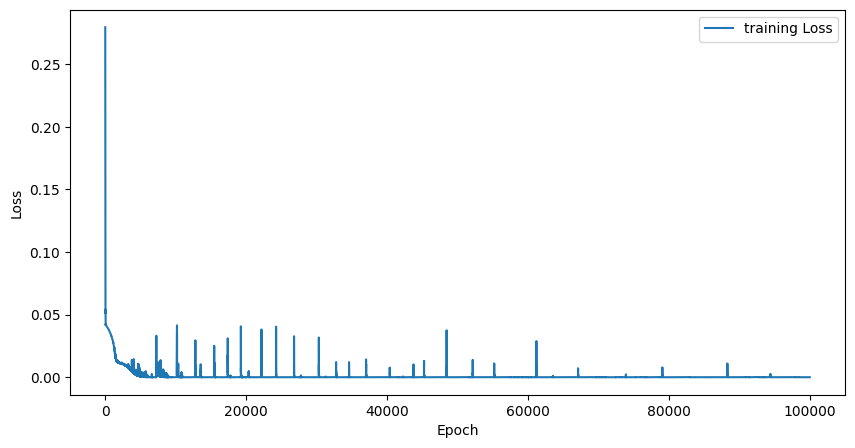

The final loss: 1.840309948875074e-08


Autoencoder(
  (encoder): Encoder(
    (conv1): GCNConv(4, 128)
    (conv2): GCNConv(128, 128)
    (conv3): GCNConv(128, 128)
    (out): Linear(in_features=128, out_features=128, bias=True)
  )
  (decoder): Decoder(
    (conv1): GCNConv(128, 128)
    (conv2): GCNConv(128, 128)
    (conv3): GCNConv(128, 4)
    (out): Linear(in_features=4, out_features=4, bias=True)
  )
)

In [17]:
class Encoder(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super().__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.out = torch.nn.Linear(hidden_channels, hidden_channels)
        
    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = self.out(x)
        x = global_mean_pool(x, batch)
        return x

class Decoder(torch.nn.Module):
    def __init__(self, hidden_channels, num_node_features):
        super().__init__()
        self.conv1 = GCNConv(hidden_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, num_node_features)
        self.out = torch.nn.Linear(num_node_features, num_node_features)
        
    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.leaky_relu(x, 0.5)
        x = self.out(x)
        return x

class Autoencoder(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super().__init__()
        self.encoder = Encoder(num_node_features, hidden_channels)
        self.decoder = Decoder(hidden_channels, num_node_features)
        
    def forward(self, x, edge_index, batch):
        encoded = self.encoder(x, edge_index, batch)
        encoded = encoded.repeat(x.shape[0], 1)
        def check(feature):
            column_mean = feature.mean(dim=0)
            mse = ((feature - column_mean)**2).mean(dim=0)
            smse = mse.sum()
            print(smse.item())
        
            # print("encoded:", encoded)
        decoded = self.decoder(encoded, edge_index, batch)
        if epoch % 1000 == 0:
            check(decoded)
        
            
            
        return decoded
    
num_nodes = 3
num_node_features = 4
hidden_channels = 128

node_features = torch.randn(num_nodes, num_node_features)
minmax = lambda x: (x-x.min())/(x.max()-x.min())
node_features = minmax(node_features)   

edge_index = []
for i in range(num_nodes):
    for j in range(num_nodes):
        if i<j:
            edge_index.append([i,j])
edge_index = torch.tensor(edge_index).t().contiguous()
data = Data(x=node_features, edge_index = edge_index)

model = Autoencoder(num_node_features=num_node_features, hidden_channels=hidden_channels)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
data = data.to(device)
batch = torch.zeros(num_nodes, dtype=torch.long).to(device)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

model.train()

loss_values = []

for epoch in tqdm(range(100000)):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, batch)
    loss = F.mse_loss(out, data.x)
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")
        
plt.figure(figsize=(10,5))
plt.plot(loss_values, label='training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("The final loss:", loss.item())
model.eval()
    

## A little change made by aistudio

把节点的特征表示压缩成了整张图的特征表示，确实可能导致信息瓶颈的问题。。我感觉信息丢失太多了。

另外，此前所使用的计算mse的方式是错误的，直接计算复制后的每一行，

结果当然是一模一样的。
正确的方法应该是拿decoded去作差，而不是encoded。

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 29/10000 [00:00<01:09, 142.77it/s]

SMSE: 0.3655388355255127
Epoch: 0, Loss: 0.3655388355255127


 10%|█         | 1028/10000 [00:06<00:55, 163.00it/s]

SMSE: 0.030529802665114403
Epoch: 1000, Loss: 0.030529802665114403


 20%|██        | 2021/10000 [00:12<00:49, 161.35it/s]

SMSE: 0.021968554705381393
Epoch: 2000, Loss: 0.021968554705381393


 30%|███       | 3025/10000 [00:18<00:42, 166.02it/s]

SMSE: 0.021424900740385056
Epoch: 3000, Loss: 0.021424900740385056


 40%|████      | 4032/10000 [00:24<00:36, 165.20it/s]

SMSE: 0.020869804546236992
Epoch: 4000, Loss: 0.020869804546236992


 50%|█████     | 5017/10000 [00:30<00:30, 164.21it/s]

SMSE: 0.02019377611577511
Epoch: 5000, Loss: 0.02019377611577511


 60%|██████    | 6019/10000 [00:37<00:23, 167.42it/s]

SMSE: 0.019393842667341232
Epoch: 6000, Loss: 0.019393842667341232


 70%|███████   | 7025/10000 [00:44<00:18, 161.38it/s]

SMSE: 0.01772330328822136
Epoch: 7000, Loss: 0.01772330328822136


 80%|████████  | 8025/10000 [00:50<00:12, 164.20it/s]

SMSE: 0.013660334050655365
Epoch: 8000, Loss: 0.013660334050655365


 90%|█████████ | 9030/10000 [00:56<00:05, 165.68it/s]

SMSE: 0.008787563070654869
Epoch: 9000, Loss: 0.008787563070654869


100%|██████████| 10000/10000 [01:02<00:00, 161.17it/s]


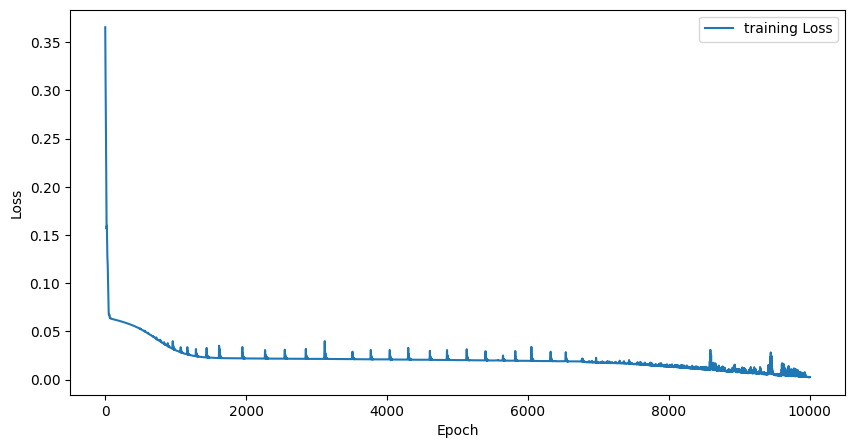

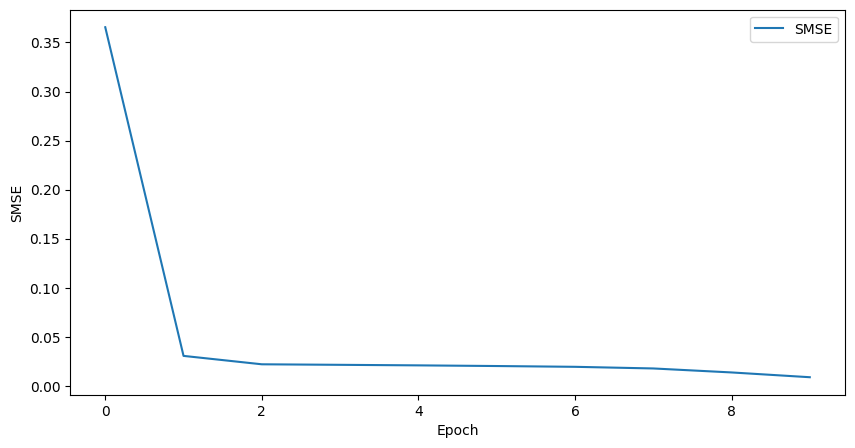

The final loss: 0.002576981671154499


Autoencoder(
  (encoder): Encoder(
    (conv1): GCNConv(4, 128)
    (conv2): GCNConv(128, 128)
    (conv3): GCNConv(128, 128)
    (out): Linear(in_features=128, out_features=128, bias=True)
  )
  (decoder): Decoder(
    (conv1): GCNConv(128, 128)
    (conv2): GCNConv(128, 128)
    (conv3): GCNConv(128, 4)
    (out): Linear(in_features=4, out_features=4, bias=True)
  )
)

In [16]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data
from tqdm import tqdm
import matplotlib.pyplot as plt
import copy

class Encoder(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super().__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.out = torch.nn.Linear(hidden_channels, hidden_channels)
        
    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = self.out(x)
        x = global_mean_pool(x, batch)
        return x

class Decoder(torch.nn.Module):
    def __init__(self, hidden_channels, num_node_features):
        super().__init__()
        self.conv1 = GCNConv(hidden_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, num_node_features)
        self.out = torch.nn.Linear(num_node_features, num_node_features)
        
    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.leaky_relu(x, 0.5)
        x = self.out(x)
        return x

class Autoencoder(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super().__init__()
        self.encoder = Encoder(num_node_features, hidden_channels)
        self.decoder = Decoder(hidden_channels, num_node_features)
        
    def forward(self, x, edge_index, batch):
        encoded = self.encoder(x, edge_index, batch)
        decoded = self.decoder(encoded.repeat(x.shape[0], 1), edge_index, batch)
        return decoded

def check(original_feature, decoded_feature):
    mse = ((original_feature - decoded_feature)**2).mean()
    smse = mse.sum()
    print(f"SMSE: {smse.item()}")
    return smse.item()
    
num_nodes = 3
num_node_features = 4
hidden_channels = 128

node_features = torch.randn(num_nodes, num_node_features)
minmax = lambda x: (x-x.min())/(x.max()-x.min())
node_features = minmax(node_features)   

edge_index = []
for i in range(num_nodes):
    for j in range(num_nodes):
        if i<j:
            edge_index.append([i,j])
edge_index = torch.tensor(edge_index).t().contiguous()
data = Data(x=node_features, edge_index = edge_index)

model = Autoencoder(num_node_features=num_node_features, hidden_channels=hidden_channels)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
data = data.to(device)
batch = torch.zeros(num_nodes, dtype=torch.long).to(device)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

model.train()

loss_values = []
smse_values = []

for epoch in tqdm(range(10000)):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, batch)
    loss = F.mse_loss(out, data.x)
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())
    if epoch % 1000 == 0:
        smse = check(data.x, out)
        smse_values.append(smse)
        print(f"Epoch: {epoch}, Loss: {loss.item()}")
        
plt.figure(figsize=(10,5))
plt.plot(loss_values, label='training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(smse_values, label='SMSE')
plt.xlabel('Epoch')
plt.ylabel('SMSE')
plt.legend()
plt.show()

print("The final loss:", loss.item())
model.eval()